In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression

import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset

from qbstyles import mpl_style

mpl_style(dark=True)

In [69]:
def transform(x):
    x = torch.tensor(x, dtype=torch.float)
    x = x.reshape(-1, 1)
    return x

def predict(model, x):
    model.eval()
    with torch.no_grad():
        return model(transform(x)).flatten().numpy()

<Axes: xlabel='x', ylabel='y'>

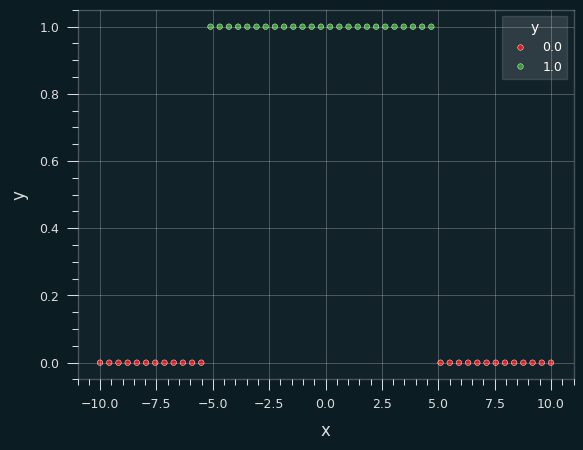

In [22]:
x = np.linspace(-10, 10)
y = np.zeros_like(x)

start = int(x.size * 0.25)
stop = int(x.size * 0.75)

y[start:stop] = 1

data = pd.DataFrame({'x': x, 'y': y})

sns.scatterplot(data=data, x='x', y='y', hue='y', markers=['x', 'o'])

In [31]:
dataset = TensorDataset(
    transform(x),
    transform(y),
)

Epoch 1/1000: loss = 0.7294, accuracy = 0.4800
Epoch 2/1000: loss = 0.7266, accuracy = 0.4800
Epoch 3/1000: loss = 0.7240, accuracy = 0.4800
Epoch 4/1000: loss = 0.7216, accuracy = 0.4800
Epoch 5/1000: loss = 0.7194, accuracy = 0.4800
Epoch 6/1000: loss = 0.7173, accuracy = 0.4800
Epoch 7/1000: loss = 0.7155, accuracy = 0.4800
Epoch 8/1000: loss = 0.7138, accuracy = 0.4800
Epoch 9/1000: loss = 0.7122, accuracy = 0.4800
Epoch 10/1000: loss = 0.7107, accuracy = 0.5000
Epoch 11/1000: loss = 0.7094, accuracy = 0.5000
Epoch 12/1000: loss = 0.7082, accuracy = 0.5000
Epoch 13/1000: loss = 0.7070, accuracy = 0.5000
Epoch 14/1000: loss = 0.7060, accuracy = 0.5000
Epoch 15/1000: loss = 0.7050, accuracy = 0.5000
Epoch 16/1000: loss = 0.7041, accuracy = 0.5000
Epoch 17/1000: loss = 0.7033, accuracy = 0.5000
Epoch 18/1000: loss = 0.7025, accuracy = 0.5000
Epoch 19/1000: loss = 0.7018, accuracy = 0.5000
Epoch 20/1000: loss = 0.7012, accuracy = 0.5000
Epoch 21/1000: loss = 0.7005, accuracy = 0.5000
E

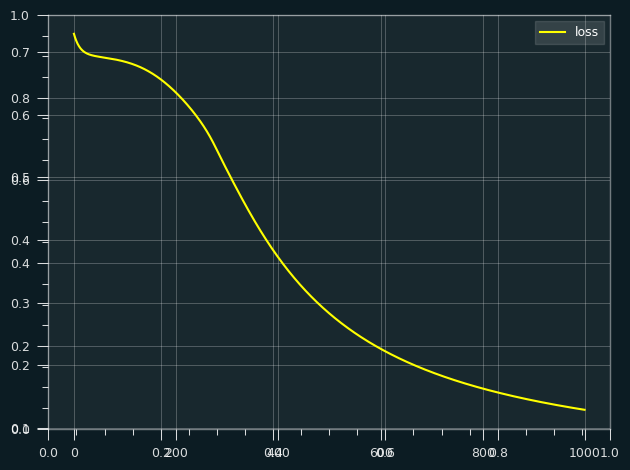

In [90]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid(),
)

optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
criterion = nn.BCELoss()

losses = []
accuracies = []
for epoch in range(1, epochs + 1):
    cost = 0
    for x_batch, y_batch in dataset:
        model.train()
        yhat = model(x_batch)
        loss = criterion(yhat, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost += loss.item()
    
    cost /= len(dataset)
    losses.append(cost)
    
    y_pred = predict(model, x).round()
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)
    
    print(f"Epoch {epoch}/{epochs}: loss = {losses[-1]:.4f}, accuracy = {accuracy:.4f}")

model_metrics = pd.DataFrame({
    "loss": losses,
    "accuracy": accuracies,
})

model_metrics.plot.line(y='loss', color='yellow')
plt.tight_layout()

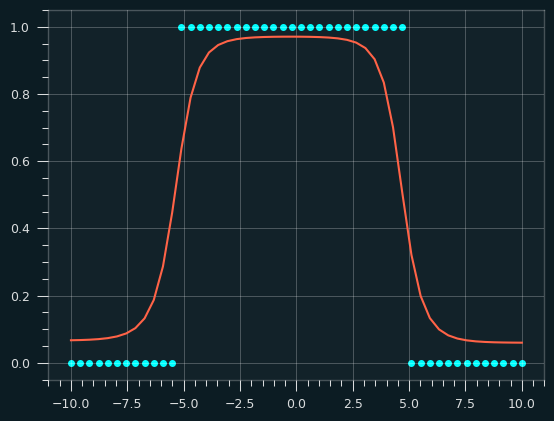

In [91]:
plt.scatter(x, y, color='cyan')
plt.plot(x, predict(model, x), color='tomato')